In [1]:
import vl from "npm:vega-lite-api";

const mark = vl
  .markBar()
  .data(
    "https://raw.githubusercontent.com/vega/vega/main/docs/data/movies.json"
  )
  .encode(vl.x().fieldQ("IMDB Rating").bin(true), vl.y().count());

await Deno.jupyter.display(mark);


In [3]:
await Deno.jupyter.display(
  { "application/json": mark.toSpec() },
  { raw: true }
);


In [4]:
import vl from "npm:vega-lite-api";

await Deno.jupyter.display(
  vl
    .markBar({ tooltip: true })
    .data([
      { a: "A", b: 28 },
      { a: "B", b: 55 },
      { a: "C", b: 43 },
      { a: "D", b: 91 },
      { a: "E", b: 81 },
      { a: "F", b: 53 },
      { a: "G", b: 19 },
      { a: "H", b: 87 },
      { a: "I", b: 52 },
    ])
    .encode(
      vl.x().fieldQ("b"),
      vl.y().fieldN("a"),
      vl.tooltip([vl.fieldQ("b"), vl.fieldN("a")])
    )
);


In [5]:
let spec = {
  $schema: "https://vega.github.io/schema/vega-lite/v5.json",
  description:
    "A bubble plot showing the correlation between health and income for 187 countries in the world (modified from an example in Lisa Charlotte Rost's blog post 'One Chart, Twelve Charting Libraries' --http://lisacharlotterost.github.io/2016/05/17/one-chart-code/).",
  width: 500,
  height: 300,
  data: {
    url: "https://raw.githubusercontent.com/vega/vega/main/docs/data/gapminder-health-income.csv",
  },
  params: [
    {
      name: "view",
      select: "interval",
      bind: "scales",
    },
  ],
  mark: "circle",
  encoding: {
    y: {
      field: "health",
      type: "quantitative",
      scale: { zero: false },
      axis: { minExtent: 30 },
    },
    x: {
      field: "income",
      scale: { type: "log" },
    },
    size: { field: "population", type: "quantitative" },
    color: { value: "#000" },
  },
};

await Deno.jupyter.display(
  { "application/vnd.vegalite.v5+json": spec },
  { raw: true }
);


In [6]:
import vl from "npm:vega-lite-api";

const plot = vl
  .markCircle()
  .params(vl.selectInterval().bind("scales"))
  .width(700)
  .data(
    "https://raw.githubusercontent.com/vega/vega/main/docs/data/gapminder-health-income.csv"
  )
  .encode(
    vl.x().field("income").scale({ type: "log" }),
    vl.y().fieldQ("health").scale({ zero: false }).axis({ minExtent: 30 }),
    vl.size(vl.fieldQ("population")),
    vl.color({ value: "#262696" })
  );

await Deno.jupyter.display(plot);


<br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br />


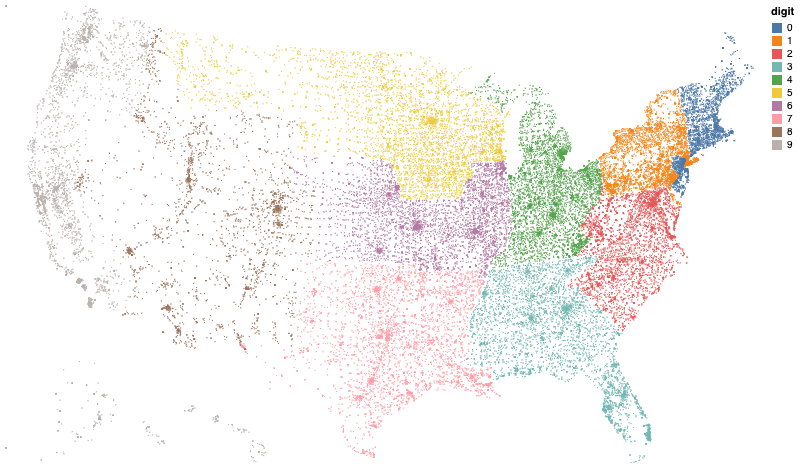

In [10]:
await Deno.jupyter.display(
  vl
    .markSquare({ size: 1, opacity: 1 })
    .data(
      "https://raw.githubusercontent.com/vega/vega-datasets/main/data/zipcodes.csv"
    )
    .transform(vl.calculate("substring(datum.zip_code, 0, 1)").as("digit"))
    .project(vl.projection("albersUsa"))
    .encode(
      vl.longitude().fieldQ("longitude"),
      vl.latitude().fieldQ("latitude"),
      vl.color().fieldN("digit")
    )
    .width(800)
    .height(Math.floor(800 / 1.75))
    .autosize({ type: "fit-x", contains: "padding" })
    .config({ view: { stroke: null } })
);
